# Prédiction des Prix Immobiliers avec Régression Linéaire
*Phase 1 : Road to Master AI*

Ce projet utilise un modèle de régression linéaire pour prédire les prix des maisons en Californie. Le dataset utilisé est le *California Housing Dataset*. L'objectif de ce projet est de démontrer les étapes du processus de machine learning allant de la préparation des données à l'évaluation du modèle.

## Structure du Projet

1. **Introduction** : Présentation des données et des objectifs du projet.
2. **Préparation des Données** : Exploration initiale, nettoyage et traitement des valeurs manquantes.
3. **Prétraitement** : Normalisation/standardisation des données pour les mettre sur la même échelle.
4. **Modélisation** : Entraînement du modèle de régression linéaire sur les données d'entraînement.
5. **Résultats et Visualisations** : Évaluation des performances et affichage des graphiques.
6. **Conclusion et Améliorations** : Résumé des performances et idées pour améliorer le modèle.


## Introduction

Le but de ce projet est de prédire le prix médian des maisons dans différents quartiers de Californie en fonction de plusieurs caractéristiques (âge des maisons, nombre de chambres, population, revenu médian, etc.). Le dataset est extrait de la base de données *California Housing Dataset*.

**Objectif** : Créer un modèle de régression linéaire et évaluer ses performances.

In [38]:
!pip install numpy pandas matplotlib scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [40]:
data = pd.read_csv('housing.csv')

## Préparation des Données

Dans cette section, nous chargeons et explorons les données. Nous utilisons `.info()` et `.describe()` pour obtenir une vue d'ensemble et nous identifions les valeurs manquantes ou les éventuelles anomalies.

### Étapes :
- Charger les données.
- Analyser la structure et les statistiques de base des données.
- Gérer les valeurs manquantes et normaliser ou standardiser les caractéristiques.

In [41]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [43]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Prétraitement

Nous appliquons ici des techniques de normalisation ou de standardisation pour mettre toutes les colonnes sur une même échelle, ce qui peut améliorer la performance du modèle. Cela est important car les caractéristiques ont des échelles variées et cela pourrait influencer les prédictions du modèle de manière non souhaitée.

In [44]:
data = data.dropna(axis=0,how="any")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [46]:
X = data[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
Y = data['median_house_value']

In [47]:
X_standardised = scaler.fit_transform(X)
X_standardised = pd.DataFrame(X_standardised, columns=X.columns)

In [48]:
print(X_standardised)

       housing_median_age  total_rooms  total_bedrooms  population  \
0                0.982163    -0.803813       -0.970325   -0.973320   
1               -0.606210     2.042130        1.348276    0.861339   
2                1.855769    -0.535189       -0.825561   -0.819769   
3                1.855769    -0.623510       -0.718768   -0.765056   
4                1.855769    -0.461970       -0.611974   -0.758879   
...                   ...          ...             ...         ...   
20428           -0.288535    -0.444580       -0.388895   -0.511787   
20429           -0.844466    -0.887557       -0.920488   -0.943315   
20430           -0.923885    -0.175042       -0.125472   -0.368826   
20431           -0.844466    -0.355344       -0.305834   -0.603564   
20432           -1.003304     0.067955        0.185416   -0.033487   

       households  median_income  
0       -0.976833       2.345163  
1        1.670373       2.332632  
2       -0.843427       1.782939  
3       -0.733562  

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X_standardised,Y, test_size=0.2, random_state= 42)

## Modélisation

Nous utilisons un modèle de régression linéaire pour prédire les valeurs cibles (prix des maisons). L'algorithme est entraîné sur l'ensemble d'entraînement et évalué sur l'ensemble de test pour mesurer sa capacité de généralisation.

**Étapes :**
- Diviser les données en ensembles d'entraînement et de test.
- Entraîner le modèle de régression linéaire.
- Faire des prédictions sur l'ensemble de test.
- Calculer les erreurs (MAE, MSE, RMSE) pour évaluer la performance.

In [51]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred =model.predict(X_test)

## Résultats et Visualisations

Nous utilisons les métriques suivantes pour évaluer la performance du modèle :
- **Mean Absolute Error (MAE)** : Montre l'erreur moyenne en unités de la cible.
- **Mean Squared Error (MSE)** : Amplifie les grandes erreurs et indique la gravité des erreurs dans les prédictions.
- **Root Mean Squared Error (RMSE)** : Ramène l'erreur moyenne à la même unité que la cible.

### Graphiques
1. **Valeurs Réelles vs. Valeurs Prédites** : Montre la proximité des prédictions avec les valeurs réelles.
2. **Distribution des Erreurs** : Histogramme pour visualiser la répartition des erreurs entre valeurs réelles et prédites.

In [52]:
# Calcul des métriques d'évaluation
mae  = mean_absolute_error(Y_test,Y_pred)
mse  = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)

# Afficher les résultats
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 56642.49929908639
Mean Squared Error (MSE): 5865619646.959267
Root Mean Squared Error (RMSE): 76587.3334629119


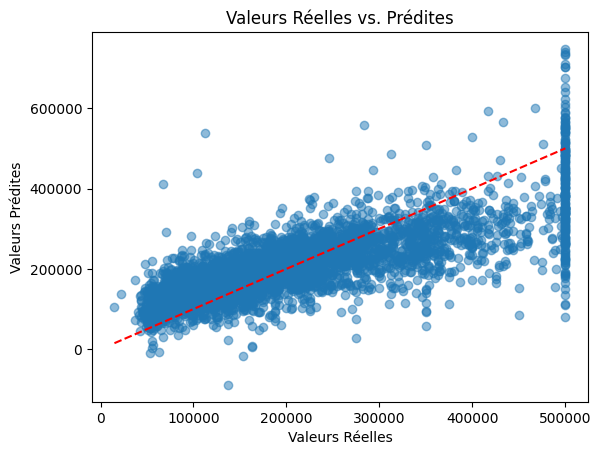

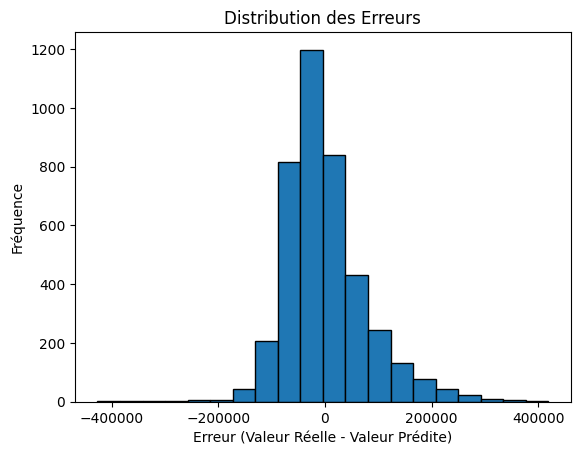

In [56]:
# Valeurs Réelles vs. Prédites
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Valeurs Réelles vs. Prédites")
plt.show()

# Distribution des Erreurs
errors = Y_test - Y_pred
plt.hist(errors, bins=20, edgecolor="black")
plt.xlabel("Erreur (Valeur Réelle - Valeur Prédite)")
plt.ylabel("Fréquence")
plt.title("Distribution des Erreurs")
plt.show()

## Conclusion et Améliorations

Ce modèle de régression linéaire a permis de capturer certaines tendances dans les prix des maisons, mais des améliorations sont possibles. Les valeurs de MAE, MSE et RMSE indiquent qu'il reste un écart significatif entre les prédictions et les valeurs réelles.

**Idées d'amélioration** :
- Essayer d'autres modèles comme les forêts aléatoires ou les modèles de boosting.
- Ajouter de nouvelles caractéristiques (feature engineering) pour enrichir le modèle.
- Utiliser la validation croisée pour une évaluation plus robuste.